In [5]:
import numpy as np
import pandas as pd

In [6]:
calendar = pd.read_csv('data/calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,6/4/2022,f,$225.00,$225.00,30,1125
1,2595,6/5/2022,f,$225.00,$225.00,30,1125
2,2595,6/6/2022,f,$225.00,$225.00,30,1125
3,2595,6/7/2022,f,$225.00,$225.00,30,1125
4,2595,6/8/2022,f,$225.00,$225.00,30,1125


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
listings = pd.read_csv('data/listings.csv')
listings.head()

C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595.0,https://www.airbnb.com/rooms/2595,2.022060e+13,6/4/2022,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since (Phone number hidden by Air...,a few days or more,39%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",$225.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,3,33,308,6/4/2022,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121.0,https://www.airbnb.com/rooms/5121,2.022060e+13,6/4/2022,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone']",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,6/4/2022,50,0,0,5/28/2009,12/2/2019,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136.0,https://www.airbnb.com/rooms/5136,2.022060e+13,6/4/2022,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2/3/2009,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,50%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,1.0,"['email', 'phone']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",$275.00,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,3,3,4,250,6/4/2022,2,1,0,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178.0,https://www.airbnb.com/rooms/5178,2.022060e+13,6/4/2022,Large Furnished Room N

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1048575 non-null  int64 
 1   date            1048575 non-null  object
 2   available       1048575 non-null  object
 3   price           1048575 non-null  object
 4   adjusted_price  1048575 non-null  object
 5   minimum_nights  1048575 non-null  int64 
 6   maximum_nights  1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


In [10]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [11]:
calendar['date'] = pd.to_datetime(calendar['date'], format='%m/%d/%Y')

In [12]:
calendar['available'].value_counts()

f    732055
t    316520
Name: available, dtype: int64

In [13]:
#1 for "true" and 0 for "false"
calendar['available'] = calendar['available'].map(lambda x: 1 if x == 't' else 0)
calendar['available'].value_counts()

0    732055
1    316520
Name: available, dtype: int64

In [14]:
calendar['price'] = calendar['price'].map(lambda x: x.replace(',',''))
calendar['price'] = calendar['price'].map(lambda x: float(x[1:]) if x[0] == '$' else float(x))

Price and adjusted_price are the same so we will drop adjusted_price

In [15]:
calendar = calendar.drop(columns=['adjusted_price'])

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1048575 non-null  int64         
 1   date            1048575 non-null  datetime64[ns]
 2   available       1048575 non-null  int64         
 3   price           1048575 non-null  float64       
 4   minimum_nights  1048575 non-null  int64         
 5   maximum_nights  1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 48.0 MB


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  float64
 1   listing_url                                   37410 non-null  object 
 2   scrape_id                                     37410 non-null  float64
 3   last_scraped                                  37410 non-null  object 
 4   name                                          37396 non-null  object 
 5   description                                   36523 non-null  object 
 6   neighborhood_overview                         22430 non-null  object 
 7   picture_url                                   37410 non-null  object 
 8   host_id                                       37410 non-null  int64  
 9   host_url                                      37410 non-null 

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               14
description                                       887
neighborhood_overview                           14980
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                          66
host_since                                         66
host_location                                     163
host_about                                      16356
host_response_time                              13210
host_response_rate                              13210
host_acceptance_rate                            11732
host_is_superhost                                  66
host_thumbnail_url          

In [20]:
len(listings)

37410

We have to figure out which columns we need and which we don't

For starters, we don't need listing_url, scrape_id, last_scraped, name, picture_url, host_name, host_since, host_thumbnail_url, host_picture_url, or calendar_last_scraped


In [21]:
listings = listings.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'listing_url', 'scrape_id', 'last_scraped',
                                  'name', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_thumbnail_url', 'host_picture_url',
                                  'calendar_last_scraped'])

Same with host location, since it is all in New York


In [22]:
listings = listings.drop(columns=['host_location'])

Now let's look at description


In [23]:
#description is similar to neighborhood_overview so we can combine then drop
listings['full_description'] = np.nan
for i in listings.index:
    if type(listings['description'][i]) == str:
        if type(listings['neighborhood_overview'][i]) == str:
            listings['full_description'][i] = listings['description'][i] + " " + listings['neighborhood_overview'][i]
        else:
            listings['full_description'][i] = listings['description'][i]
    elif type(listings['neighborhood_overview'][i]):
        listings['full_description'][i] = listings['neighborhood_overview'][i]
    else:
        listings['full_description'][i] = np.nan

C:\Users\matth\AppData\Local\Temp/ipykernel_27608/993632117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['description'][i] + " " + listings['neighborhood_overview'][i]
C:\Users\matth\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
listings = listings.drop(columns=['description', 'neighborhood_overview'])

In [25]:
#Let's also add host_about to full_description
for i in listings.index:
    if type(listings['full_description'][i]) == str:
        if type(listings['host_about'][i]) == str:
            listings['full_description'][i] = listings['full_description'][i] + " " + listings['host_about'][i]
        else:
            listings['full_description'][i] = listings['full_description'][i]
    elif type(listings['host_about'][i]):
        listings['full_description'][i] = listings['host_about'][i]
    else:
        listings['full_description'][i] = np.nan

C:\Users\matth\AppData\Local\Temp/ipykernel_27608/2684406174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['full_description'][i] + " " + listings['host_about'][i]
C:\Users\matth\AppData\Local\Temp/ipykernel_27608/2684406174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['full_description'][i] = listings['full_description'][i]
C:\Users\matth\AppData\Local\Temp/ipykernel_27608/2684406174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [26]:
listings = listings.drop(columns=['host_about'])

In [27]:
listings['host_response_time'].value_counts()

within an hour        14578
within a few hours     5516
within a day           3325
a few days or more      781
Name: host_response_time, dtype: int64

In [28]:
listings['host_response_time'] = listings['host_response_time'].fillna('unknown')

In [29]:
listings['host_response_time'].value_counts()

within an hour        14578
unknown               13210
within a few hours     5516
within a day           3325
a few days or more      781
Name: host_response_time, dtype: int64

Let's drop host_response_rate and host_acceptance_rate since there are too many of them

In [30]:
listings = listings.drop(columns=['host_response_rate', 'host_acceptance_rate'])

host_neighbourhood and neighbourhood is the same so let's drop neighbourhood


In [31]:
listings = listings.drop(columns=['neighbourhood'])

Bathrooms has too many nan values.


In [32]:
listings = listings.drop(columns=['bathrooms', 'bathrooms_text'])

Bedrooms and beds are basically the same same so let's drop bedrooms


In [33]:
listings = listings.drop(columns=['bedrooms'])

Let's fix price

In [34]:
listings['price'] = listings['price'].map(lambda x: x.replace(',',''))
listings['price'] = listings['price'].map(lambda x: float(x[1:]) if x[0] == '$' else float(x))
type(listings['price'])

pandas.core.series.Series

calendar_updated has too many nan values


In [35]:
listings = listings.drop(columns=['calendar_updated'])

Let's combine first_review and last_review


In [36]:
listings['review'] = str(listings['first_review']) + " " + str(listings['last_review'])
listings = listings.drop(columns=['first_review', 'last_review'])

We will drop license then check the nulls again


In [37]:
listings = listings.drop(columns=['license'])

In [38]:
listings.isna().sum()

id                                                 0
host_id                                            0
host_response_time                                 0
host_is_superhost                                 66
host_neighbourhood                              7542
host_listings_count                               66
host_total_listings_count                         66
host_verifications                                 0
host_has_profile_pic                              66
host_identity_verified                            66
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
beds                                             901
amenities                                     

I am going to readjust the columns so they don't have na values.

In [39]:
listings['review_scores_rating'] = listings['review_scores_rating'].fillna('unknown')
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna('unknown')
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].fillna('unknown')
listings['review_scores_checkin'] = listings['review_scores_checkin'].fillna('unknown')
listings['review_scores_communication'] = listings['review_scores_communication'].fillna('unknown')
listings['review_scores_location'] = listings['review_scores_location'].fillna('unknown')
listings['review_scores_value'] = listings['review_scores_value'].fillna('unknown')
listings = listings.drop(columns=['host_neighbourhood', 'reviews_per_month'])
listings.isna().sum()

id                                                0
host_id                                           0
host_response_time                                0
host_is_superhost                                66
host_listings_count                              66
host_total_listings_count                        66
host_verifications                                0
host_has_profile_pic                             66
host_identity_verified                           66
neighbourhood_cleansed                            0
neighbourhood_group_cleansed                      0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
beds                                            901
amenities                                         0
price                                             0
minimum_nigh

host_total_listings_counts look like basically the same thing as host_listings_counts so let's just drop it

In [40]:
listings = listings.drop(columns=['host_total_listings_count'])

Too many night values listed. Let's just keep the first 2


In [41]:
listings = listings.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                                  'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'])

availability_365 incompasses the rest of them, so let's drop the rest

In [42]:
listings = listings.drop(columns=['availability_30', 'availability_60', 'availability_90'])

Number of reviews and calculated host listings seem to be listed multiple times under different names. Let's change that

In [43]:
listings = listings.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_entire_homes',
                                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

lets drop na


In [44]:
listings.dropna(inplace=True)
listings.isna().sum()

id                                0
host_id                           0
host_response_time                0
host_is_superhost                 0
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication 

In [45]:
listings.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,full_description,review
0,2595.0,2845,a few days or more,f,6.0,"['email', 'phone', 'work_email']",t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225.0,30,1125,t,308,48,4.7,4.72,4.62,4.76,4.79,4.86,4.41,f,3,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,5121.0,7356,within an hour,f,1.0,"['email', 'phone']",t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60.0,30,730,t,365,50,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,2,One room available for rent in a 2 bedroom apt...,0 11/21/2009\n1 5/28/2009\n2 ...
2,5136.0,7378,within an hour,f,1.0,"['email', 'phone']",t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275.0,21,1125,t,250,2,5.0,5.0,5.0,5.0,5.0,4.5,5.0,f,1,We welcome you to stay in our lovely 2 br dupl...,0 11/21/2009\n1 5/28/2009\n2 ...
3,5178.0,8967,within a day,f,1.0,"['email', 'phone']",t,f,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68.0,2,14,t,172,536,4.23,4.24,3.75,4.66,4.44,4.87,4.39,f,1,Please don’t expect the luxury here just a bas...,0 11/21/2009\n1 5/28/2009\n2 ...
4,5203.0,7490,unknown,f,1.0,"['email', 'phone']",t,t,Upper West Side,Manhattan,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75.0,2,14,t,0,118,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,1,"Our best guests are seeking a safe, clean, spa...",0 11/21/2009\n1 5/28/2009\n2 ...


Let's turn all t f columns into 1 and 0 columns where 1 is t and 0 is f


In [46]:
listings['host_is_superhost'] = listings['host_is_superhost'].map(lambda x: 1 if x == 't' else 0)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map(lambda x: 1 if x == 't' else 0)
listings['host_identity_verified'] = listings['host_identity_verified'].map(lambda x: 1 if x == 't' else 0)
listings['has_availability'] = listings['has_availability'].map(lambda x: 1 if x == 't' else 0)
listings['instant_bookable'] = listings['instant_bookable'].map(lambda x: 1 if x == 't' else 0)

In [47]:
len(listings)

36050

In [48]:
len(calendar['listing_id'].unique())

2873

In [49]:
listings['id'] = listings['id'].map(lambda x: int(x))
len(listings['id'].unique())

35899

Let's merge calendar and listings

In [50]:
calendar = calendar.rename(columns={'listing_id': 'id'})
calendar.head()

,id,date,available,price,minimum_nights,maximum_nights
0,2595,2022-06-04,0,225.0,30,1125
1,2595,2022-06-05,0,225.0,30,1125
2,2595,2022-06-06,0,225.0,30,1125
3,2595,2022-06-07,0,225.0,30,1125
4,2595,2022-06-08,0,225.0,30,1125


In [51]:
df_full = pd.merge(calendar, listings.drop(columns=['price', 'minimum_nights', 'maximum_nights']), how='left', on='id')
df_full.head()

,id,date,available,price,minimum_nights,maximum_nights,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,full_description,review
0,2595,2022-06-04,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
1,2595,2022-06-05,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
2,2595,2022-06-06,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
3,2595,2022-06-07,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...
4,2595,2022-06-08,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...


In [52]:
len(df_full)

1048575

In [53]:
df_full.isna().sum()

id                                    0
date                                  0
available                             0
price                                 0
minimum_nights                        0
maximum_nights                        0
host_id                           13505
host_response_time                13505
host_is_superhost                 13505
host_listings_count               13505
host_verifications                13505
host_has_profile_pic              13505
host_identity_verified            13505
neighbourhood_cleansed            13505
neighbourhood_group_cleansed      13505
latitude                          13505
longitude                         13505
property_type                     13505
room_type                         13505
accommodates                      13505
beds                              13505
amenities                         13505
has_availability                  13505
availability_365                  13505
number_of_reviews                 13505


In [54]:
df_full = df_full.dropna()
len(df_full)

1035070

In [55]:
df_full['month'] = df_full['date'].dt.month
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_full['month'] = df_full['month'].map(lambda x: month_dict[x])
df_full['month'].value_counts()

Jul    87916
Aug    87916
Oct    87916
Dec    87916
Jan    87916
Mar    87909
May    87885
Sep    85080
Nov    85080
Jun    85078
Apr    85050
Feb    79408
Name: month, dtype: int64

Now let's export this data set

In [107]:
#df_full.to_csv('data/df_full.csv')

OSError: [Errno 28] No space left on device

___

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df_full.head()

,id,date,available,price,minimum_nights,maximum_nights,host_id,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,amenities,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,full_description,review,month
0,2595,2022-06-04,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...,Jun
1,2595,2022-06-05,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...,Jun
2,2595,2022-06-06,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...,Jun
3,2595,2022-06-07,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...,Jun
4,2595,2022-06-08,0,225.0,30,1125,2845.0,a few days or more,0.0,6.0,"['email', 'phone', 'work_email']",1.0,1.0,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1.0,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",1.0,308.0,48.0,4.7,4.72,4.62,4.76,4.79,4.86,4.41,0.0,3.0,"Beautiful, spacious skylit studio in the heart...",0 11/21/2009\n1 5/28/2009\n2 ...,Jun


In [59]:
#df_full.drop(columns=['Unnamed: 0'], inplace=True)
#df_full.head()

Let's run some EDA first and see what we can find


<AxesSubplot:xlabel='host_response_time', ylabel='price'>

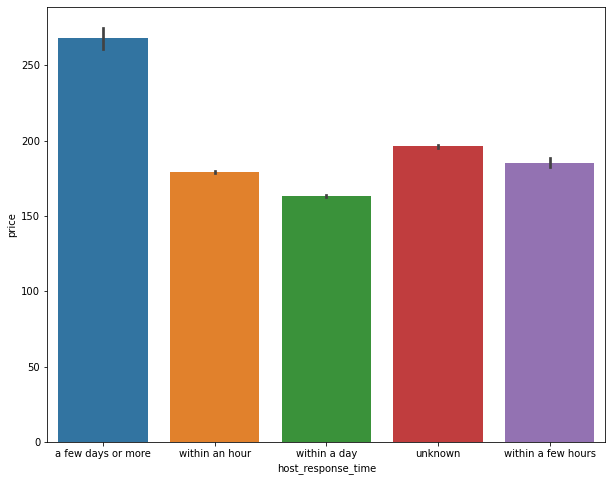

In [60]:
#Price vs host_response_time
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="host_response_time", data=df_full)

A host that responds in a few days or more has the highest priced AirBnBs. The rest are roughly the same

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

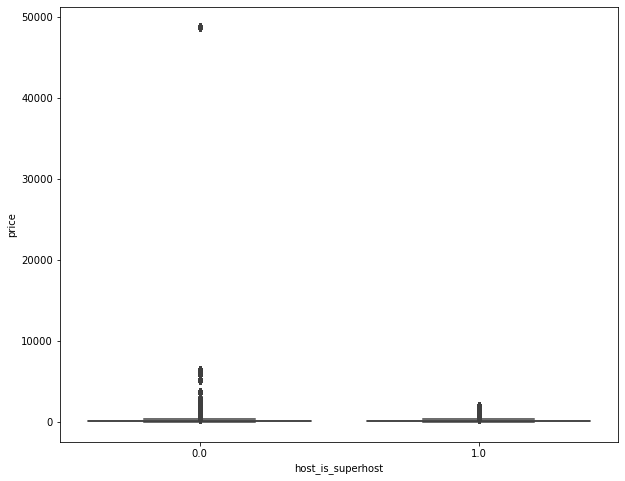

In [61]:
#Price vs host_is_superhost
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full, x='host_is_superhost', y='price')

There are too many outliers that we can't see the data. Let's look where the price is under $1000


<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

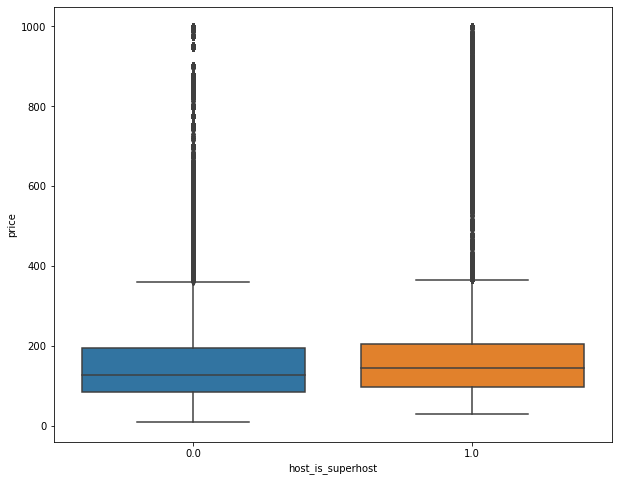

In [62]:
#Price < $1000 vs host_is_superhost
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_is_superhost', y='price')

They look about even with being a superhost maybe being a bit higher.

<AxesSubplot:xlabel='host_listings_count', ylabel='price'>

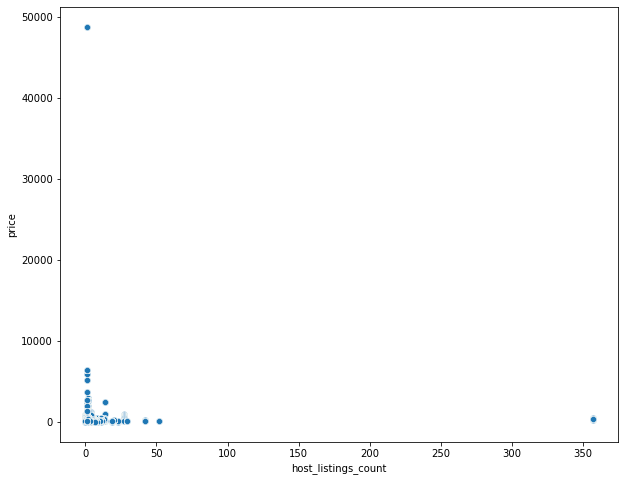

In [63]:
#Price vs host_listings_count
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='host_listings_count', y='price')

There doesn't seem to be any patterns here

<AxesSubplot:xlabel='host_has_profile_pic', ylabel='price'>

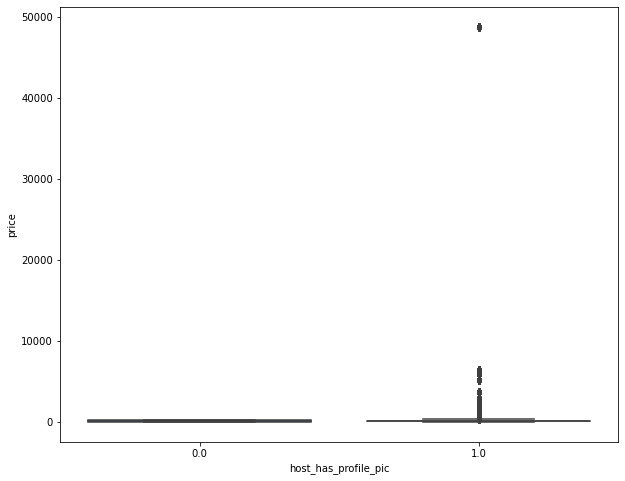

In [64]:
#Price vs host_has_profile_pic
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full, x='host_has_profile_pic', y='price')

Again there are a lot of outliers making it hard to see the data so let's zoom in on the less than $1000 group


<AxesSubplot:xlabel='host_has_profile_pic', ylabel='price'>

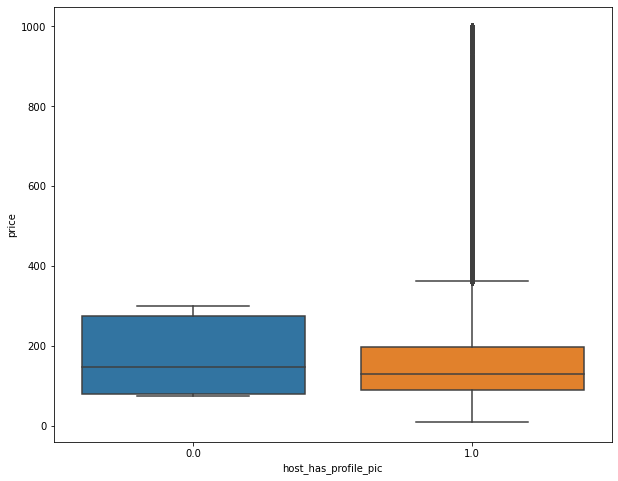

In [65]:
#Price < $1000 vs host_has_profile_pic
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_has_profile_pic', y='price')

It isn't clear if one should have a profile pic based on the boxplot.

Now that we know there are outliers, let's just look at the less than $1000 for host_identity_verified

<AxesSubplot:xlabel='host_identity_verified', ylabel='price'>

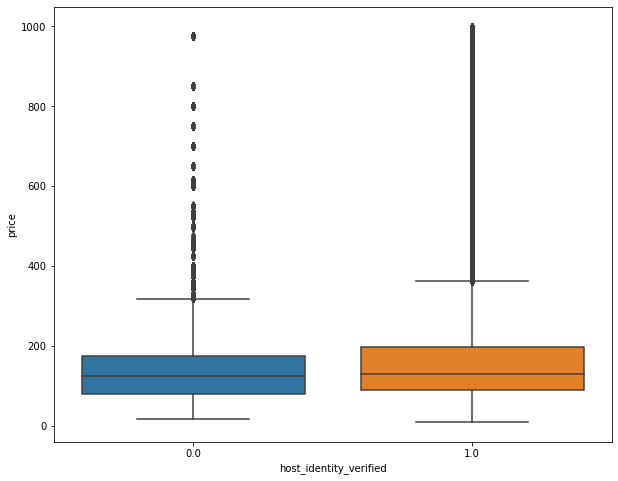

In [66]:
#Price < $1000 vs host_identity_verified
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full[df_full['price'] < 1000], x='host_identity_verified', y='price')

Having your identity verified at best gives a tiny edge on it not being verified

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

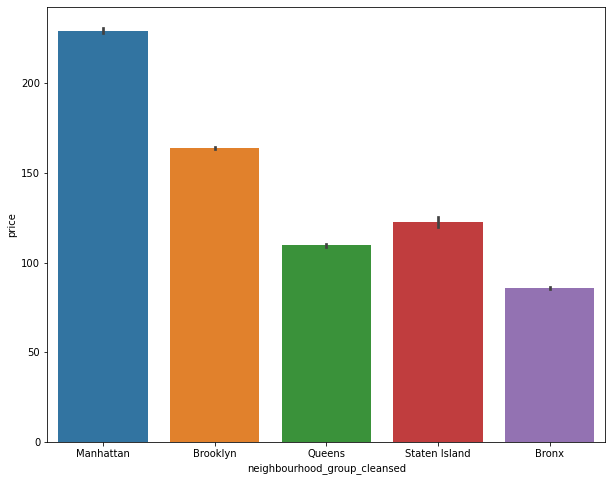

In [67]:
#Price vs boroughs
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="neighbourhood_group_cleansed", data=df_full)

Manhattan costs much more than the other boroughs of New York. Brooklyn is second highest priced, followed by Staten Island, Queens, and the Bronx has the lowest priced AirBnBs.

<AxesSubplot:xlabel='room_type', ylabel='price'>

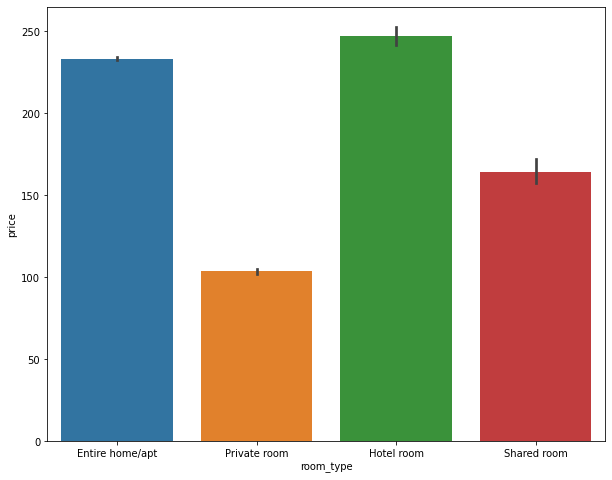

In [68]:
#Price vs Room type
plt.figure(figsize=(10,8))
sns.barplot(y="price", x="room_type", data=df_full)

Hotel_room and Entire home/apt AirBnBs cost the most. A private room costs the least.

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

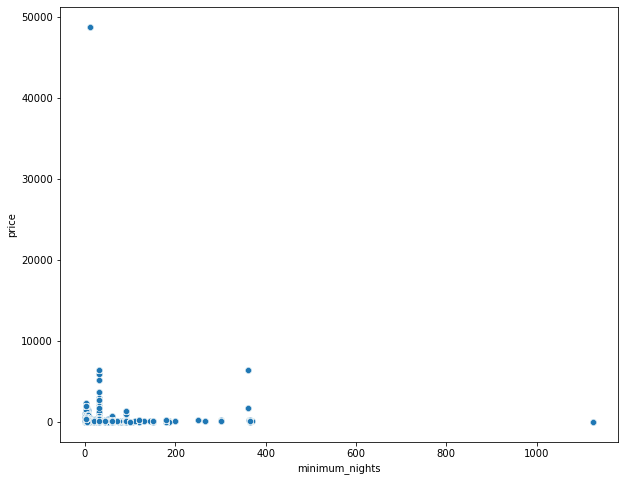

In [69]:
#Price vs Min Nights
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='minimum_nights', y='price')

<AxesSubplot:xlabel='maximum_nights', ylabel='price'>

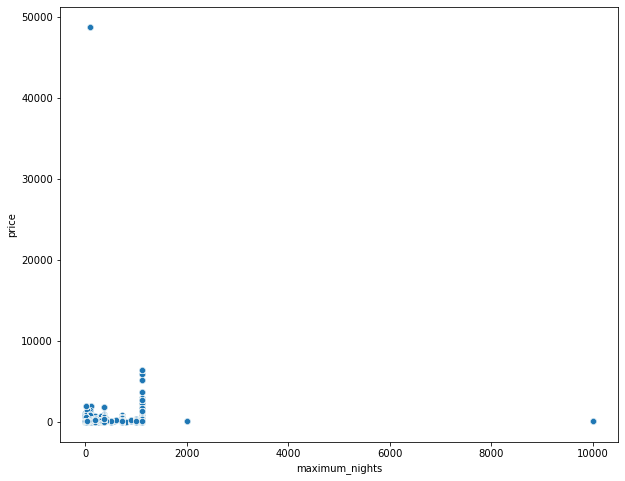

In [70]:
#Price vs Max Nights
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='maximum_nights', y='price')

Can't seem to find a pattern


<AxesSubplot:xlabel='has_availability', ylabel='price'>

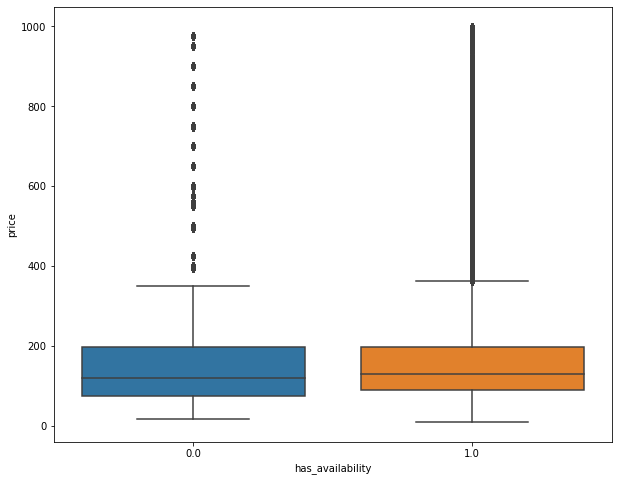

In [71]:
#Price < $1000 vs Has Availability
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full[df_full['price'] < 1000], x='has_availability', y='price')

Having availability at best only gives a tiny price increase


<AxesSubplot:xlabel='availability_365', ylabel='price'>

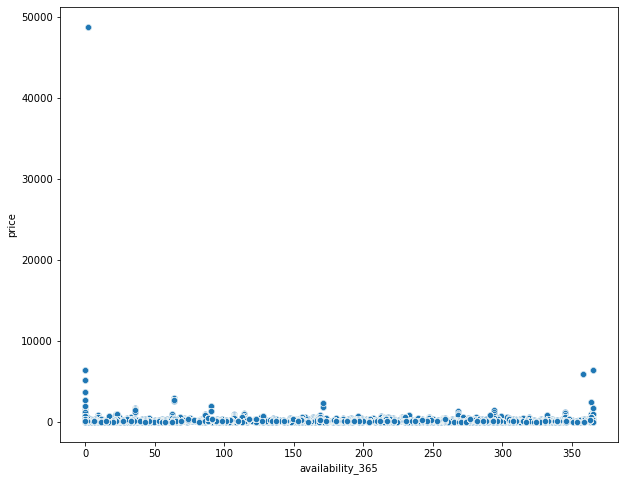

In [72]:
#Price vs availability_365
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='availability_365', y='price')

We can't see any pattern here


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

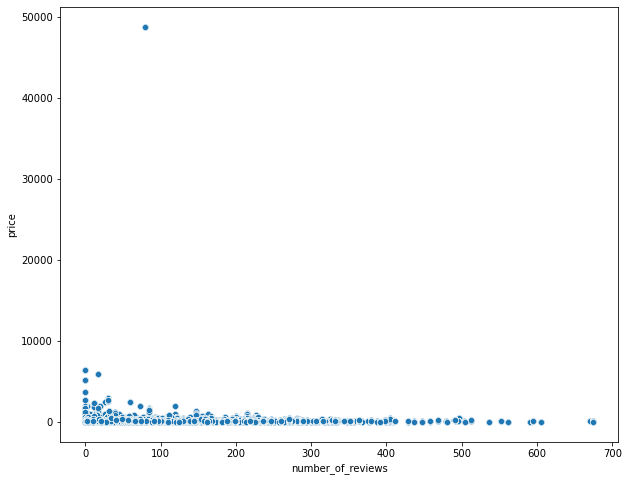

In [73]:
#Price vs Number of Reviews
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='number_of_reviews', y='price')

<AxesSubplot:xlabel='instant_bookable', ylabel='price'>

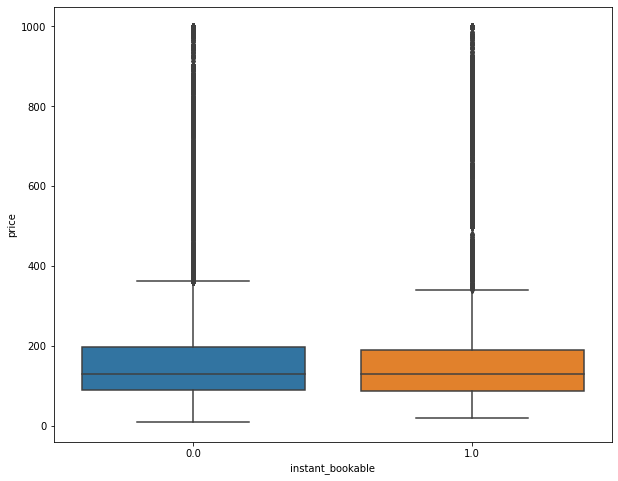

In [74]:
#Price < $1000 vs Instant Bookable
plt.figure(figsize=(10,8))
sns.boxplot(data=df_full[df_full['price'] < 1000], x='instant_bookable', y='price')

There is no noticeable difference in having or not having instant bookable 

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

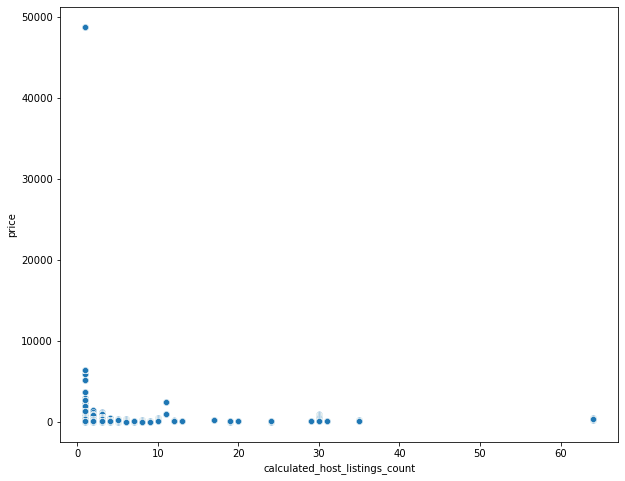

In [75]:
#Price vs Host Listings Count
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_full, x='calculated_host_listings_count', y='price')

No pattern

<AxesSubplot:xlabel='month', ylabel='price'>

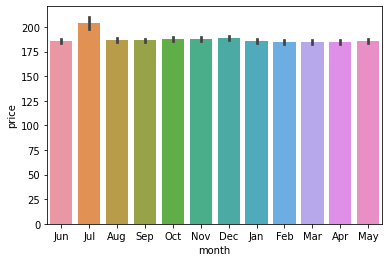

In [76]:
sns.barplot(y="price", x="month", data=df_full)

Only July seems to have an increase in price. But not by much


____

To calculate the estimated price of an AirBnB, we will use a regression model. I will try this for each borrow.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [78]:
#df_full = pd.read_csv('data/df_full.csv')
#df_full.head()

Making a boroughs dataframe to make a good heatmap

In [79]:
dummy_array = ['neighbourhood_group_cleansed']
listings_dummy = pd.get_dummies(listings, columns=dummy_array, drop_first=False)

In [80]:
boroughs = pd.get_dummies(df_full[['price', 'neighbourhood_group_cleansed']], columns=['neighbourhood_group_cleansed'])

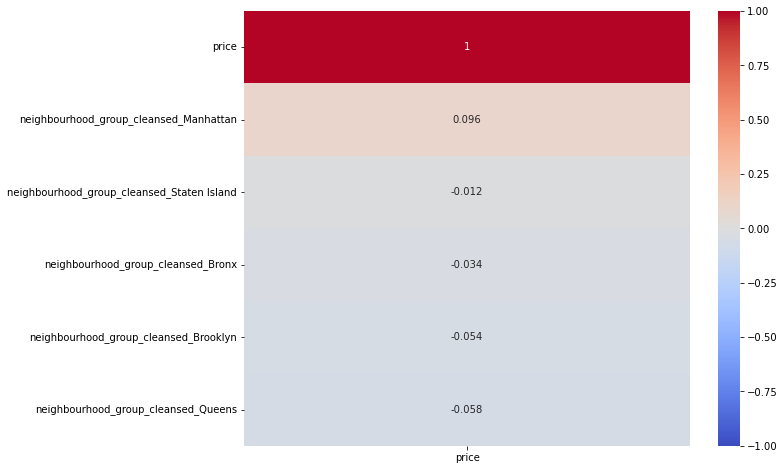

In [81]:
#look at the heat map
plt.figure(figsize=(10,8))
sns.heatmap(boroughs.corr()[['price']].sort_values(by='price',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

We will first look at it in order of relevance. Manhattan will go first

In [82]:
len(df_full)

1035070

In [83]:
Manhattan = df_full.copy()
Manhattan = Manhattan[Manhattan['neighbourhood_group_cleansed'] == 'Manhattan']
len(Manhattan)

469320

As we saw in the EDA section, we should make dummies of host_response_time and room_type

In [84]:
Manhattan_dummies = pd.get_dummies(Manhattan, columns=['host_response_time', 'room_type'])

In [85]:
Manhattan_dummies.corr()['price'].sort_values()

room_type_Private room                  -0.128061
longitude                               -0.107898
latitude                                -0.096309
has_availability                        -0.076666
number_of_reviews                       -0.054570
host_response_time_within a day         -0.041290
host_identity_verified                  -0.034939
host_is_superhost                       -0.019604
calculated_host_listings_count          -0.016046
host_response_time_within an hour       -0.014874
instant_bookable                        -0.012008
host_response_time_within a few hours   -0.008531
host_id                                  0.000784
host_has_profile_pic                     0.001274
id                                       0.001468
room_type_Shared room                    0.003272
host_listings_count                      0.004914
available                                0.015329
availability_365                         0.018623
host_response_time_unknown               0.026754


Let's create a model. I'll keep adding features until the model doesn't get better. I'll do this for each borough. (Note: I did not save all of them what you are seeing is the best model)

In [86]:
def tts_borough(df, xvars, dge):
    X = df[xvars]
    y = df['price']
    poly = PolynomialFeatures(include_bias = False, degree = dge)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)
    return X_train, X_test, y_train, y_test

In [87]:
xvars = ['accommodates', 'beds', 'room_type_Private room', 'room_type_Entire home/apt', 'longitude', 'latitude', 'has_availability']
         #'number_of_reviews', 'maximum_nights', 'host_response_time_within a day', 'minimum_nights', 'host_response_time_unknown']
X_train, X_test, y_train, y_test = tts_borough(Manhattan_dummies, xvars, 2)

Let's make a linear regression model


In [88]:
lr = LinearRegression()

In [89]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.14992254254323414

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
prediction = lr.predict(X_test)

The function is

In [92]:
print(f'Model intercept: {lr.intercept_}')
print(f'Model coefficient values: {lr.coef_}')

Model intercept: -531306042.6143767
Model coefficient values: [-1.01403997e+05  1.74468510e+05  1.10669162e+04  6.41183001e+04
 -1.17780751e+07  4.69007473e+06 -5.17404389e+04  2.98247609e+00
 -4.54046484e+00 -1.33172658e+02 -8.63614122e+01 -1.27509522e+03
  1.75022759e+02  9.74183237e+01  5.66306659e+00  1.85526142e+02
  1.43533249e+02  1.68401727e+03 -1.22127733e+03 -2.83689769e+02
  1.10669163e+04  1.55542511e-06  4.22198899e+02  2.21003791e+02
  1.46667907e+02  6.41183005e+04  1.46014147e+03 -4.96444605e+02
  6.02715899e+01 -6.91263456e+04  3.80068200e+04 -7.46493526e+02
 -2.30322881e+04  1.18339523e+03 -5.17404389e+04]


The R^2 value is

In [93]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.141631773839774
Testing R2: 0.19491185140151768


The mean squared error is

In [94]:
metrics.mean_squared_error(y_test, prediction)

175396.3974895145

And the root mean squered error is

In [95]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

418.803530894278

How about the mean of residuals

In [96]:
residuals = y_test - prediction
np.abs(residuals).mean()

117.34281586432186

This model isn't very good. There error is high and doesn't count for much of the data. Let's try the decision tree regressor model

In [97]:
Manhattan_dummies.corr()['price'].sort_values()

room_type_Private room                  -0.128061
longitude                               -0.107898
latitude                                -0.096309
has_availability                        -0.076666
number_of_reviews                       -0.054570
host_response_time_within a day         -0.041290
host_identity_verified                  -0.034939
host_is_superhost                       -0.019604
calculated_host_listings_count          -0.016046
host_response_time_within an hour       -0.014874
instant_bookable                        -0.012008
host_response_time_within a few hours   -0.008531
host_id                                  0.000784
host_has_profile_pic                     0.001274
id                                       0.001468
room_type_Shared room                    0.003272
host_listings_count                      0.004914
available                                0.015329
availability_365                         0.018623
host_response_time_unknown               0.026754


Again, I did not save all of them what you are seeing is the best model

In [98]:
xvars = ['accommodates', 'beds', 'room_type_Private room', 'room_type_Entire home/apt', 'longitude', 'latitude']
X = Manhattan_dummies[xvars]
y = Manhattan_dummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [99]:
#I tweeked this until I got the best result
dt = DecisionTreeRegressor(random_state=42)#max_depth=35, min_samples_split=2, min_samples_leaf=2, random_state=42)

In [100]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [101]:
prediction = dt.predict(X_test)

In [102]:
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.47327498499947585
Score on testing set: 0.6028663936001599


In [103]:
metrics.mean_squared_error(y_test, prediction)

86519.4749243413

In [104]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

294.14192989837625

In [105]:
residuals = y_test - prediction
np.abs(residuals).mean()

13.617887454514777

This model is definitly better than the linear regression model